# <span style="color:blue"> Laboratorio di simulazione numerica (LSN) </span>

## <span style="color:green">  Esercitazione numerica 1</span>


### Esercizio 01.1


Lo scopo dell'esercizio è testare il funzionamento del generatore di numeri pseudo-casuali fornito nel sito Ariel di LSN. Per prima cosa viene effettuata una stima dell'integrale $\langle r \rangle = \int_0^1 r dr = 1/2$ e della sua incertezza statistica usando la media a blocchi, dopodichè si procede col calcolo della varianza $\sigma^2 = \int_0^1 (r-1/2)^2 dr = 1/12$ in funzione del numero di blocchi ed infine viene effettuato un test del chi-quadro per verificare la bontà del generatore.


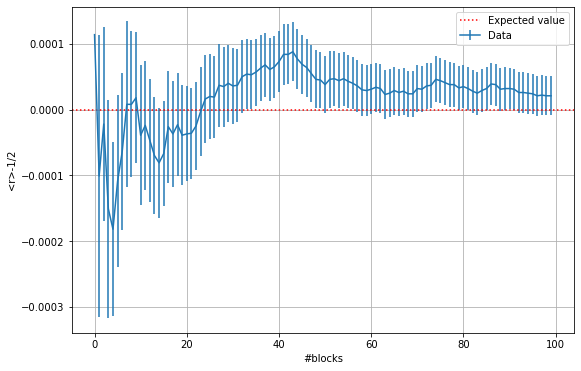

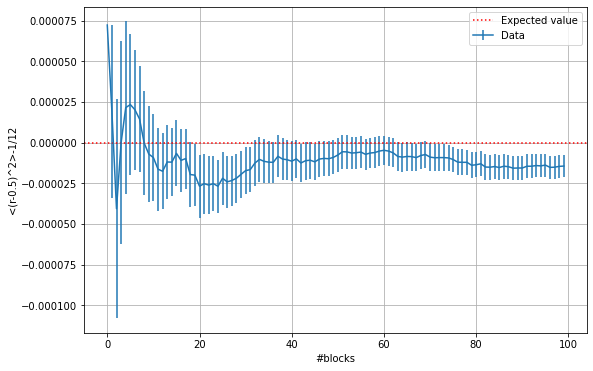

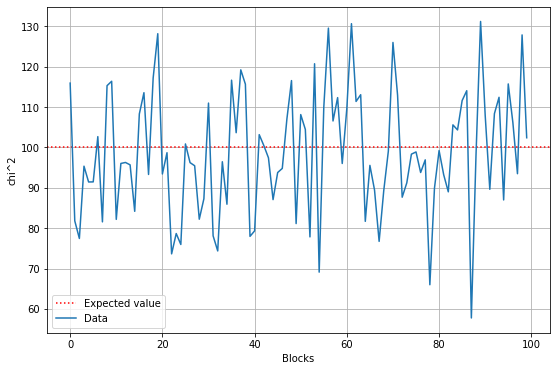

Average chi^2 =  98.5281


In [4]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np

# Mean
plt.figure(1, figsize = (9, 6))

prog_average = np.loadtxt("../results/EX011(1).dat", usecols=0)
prog_error = np.loadtxt("../results/EX011(1).dat", usecols=1)
x = np.arange(0,100) # Number of throws = block * (Number of throws in each block)

plt.axhline(y=0, color='r', linestyle="dotted", label = "Expected value")

plt.errorbar(x, prog_average - 0.5, yerr=prog_error, label="Data")
plt.xlabel('#blocks')
plt.ylabel('<r>-1/2')
plt.grid(True)
plt.legend()

# Variance
plt.figure(2, figsize = (9, 6))
prog_average = np.loadtxt("../results/EX011(2).dat", usecols=0)
prog_error = np.loadtxt("../results/EX011(2).dat", usecols=1)
x = np.arange(0,100) # Number of throws = block * (Number of throws in each block)

plt.axhline(y=0, color='r', linestyle="dotted", label = "Expected value")
plt.errorbar(x, prog_average - 1/12, yerr=prog_error, label="Data")
plt.xlabel('#blocks')
plt.ylabel('<(r-0.5)^2>-1/12')
plt.grid(True)
plt.legend()

# Chi^2
plt.figure(3, figsize = (9, 6))
chi_sqrd = np.loadtxt("../results/chi_sqrd.dat", usecols=0)
x = np.arange(0,100) # Number of throws = block * (Number of throws in each block)

plt.axhline(y=100, color='r', linestyle="dotted", label = "Expected value")
plt.plot(x,chi_sqrd, label="Data" )
plt.xlabel('Blocks')
plt.ylabel('chi^2')
plt.grid(True)
plt.legend()

plt.show()

average_chi_sqrd = np.sum(chi_sqrd,0)/100
print("Average chi^2 = ", average_chi_sqrd)

Il grafico del valor medio dell'integrale mostra una discrepanza col valor atteso che rientra entro la sua incertezza statistica, stessa cosa per il valor medio della varianza.

Il test del chi quadro, calcolato dividendo $[0,1]$ in $M=100$ sotto-intervalli, riporta un valor medio su $j=1,...,100$ realizzazioni di $n=10^4$ numeri pseudo-casuali, di $\chi^2=98.6$, molto vicino al valore di aspettazione($\chi^2_{expected}=M=100$).
L'ultimo grafico mostra il valore di $\chi^2$ calcolato in ogni realizzazione. Lo si osserva oscillare attorno al valore di aspettazione e non possiamo dunque affermare che i nostri **non** siano generati da una distribuzione non uniforme. Assumiamo quindi che siano uniformemente distribuiti. 

### Esercizio 01.2

L'obiettivo dell'esercizio è modificare il generatore di numeri pseudo-casuali in modo da poter generare numeri con due diverse distribuzioni di probabilità attraverso il metodo dell'inverso della cumulativa, in particolare un'esponenziale $p(x)=\lambda exp(-\lambda x)$, $x\in [0;+\infty]$ ed una distribuzione di Cauchy-Lorentz $p(x)=\frac{1}{\pi}\frac{\Gamma}{(x-\mu)^2+\Gamma^2}$, $x\in [-\infty;+\infty]$.
Dopodichè si realizzino 3 grafici, ognuno contenente 4 istogrammi ottenuti con $10^4$ realizzazioni di $S_N = \frac{1}{N}\sum_{i=1}^N x_i$ variando $N=1,2,10,100$, utilizzando rispettivamente un **dado uniforme**, un **dado esponenziale** ed un **dado Lorentziano**.

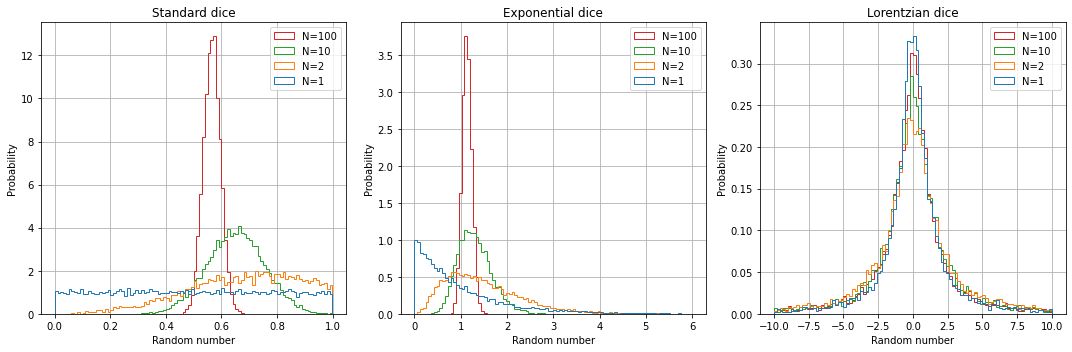

In [5]:
average_standard_dice = np.loadtxt("../results/EX012.dat", usecols=(0,3,6,9))
average_exponential_dice = np.loadtxt("../results/EX012.dat", usecols=(1,4,7,10))
average_lorentzian_dice = np.loadtxt("../results/EX012.dat", usecols=(2,5,8,11))

n_bins = 100
plt.figure(figsize=(15,5))

# Uso ambiente subplot per disegnare grafici affiancati
plt.subplot(131)
standard_dice_hist = plt.hist([average_standard_dice[:,0],average_standard_dice[:,1],
          average_standard_dice[:,2],average_standard_dice[:,3]], n_bins, density=True,\
          label=['N=1','N=2','N=10','N=100'], range=(0,1), histtype='step')
plt.title('Standard dice')
plt.grid(True)
plt.legend ()
plt.xlabel('Random number')
plt.ylabel('Probability')

plt.subplot(132)
exponential_dice_hist = plt.hist([average_exponential_dice[:,0],average_exponential_dice[:,1],
          average_exponential_dice[:,2],average_exponential_dice[:,3]], n_bins, density=True,\
          label=['N=1','N=2','N=10','N=100'], range=(0,6), histtype='step')
plt.title('Exponential dice')
plt.grid(True)
plt.legend ()
plt.xlabel('Random number')
plt.ylabel('Probability')

plt.subplot(133)
lorentzian_dice_hist = plt.hist([average_lorentzian_dice[:,0],average_lorentzian_dice[:,1],
          average_lorentzian_dice[:,2],average_lorentzian_dice[:,3]], n_bins, density=True,\
          label=['N=1','N=2','N=10','N=100'], range=(-10,10), histtype='step')
plt.title('Lorentzian dice')
plt.grid(True)
plt.legend ()
plt.xlabel('Random number')
plt.ylabel('Probability')

plt.tight_layout()
plt.show()

Si osserva che nei primi due casi al cresce di $N$ le distribuzioni tendono ad una Gaussiana, poichè vale il Teorema del Limite Centrale. Ciò non accade per la distribuzione di Cauchy-Lorentz poichè ha varianza non finita. Tuttavia la distribuzione è stabile, ossia al crescere di $N$ si ottiene sempre la distribuzione di Cauchy-Lorentz.

Di seguito, per i casi $N=100$, si mostra il fit con una funzione Gaussiana per il dado standard ed esponenziale ed il fit con una Lorentziana per l'altro caso.

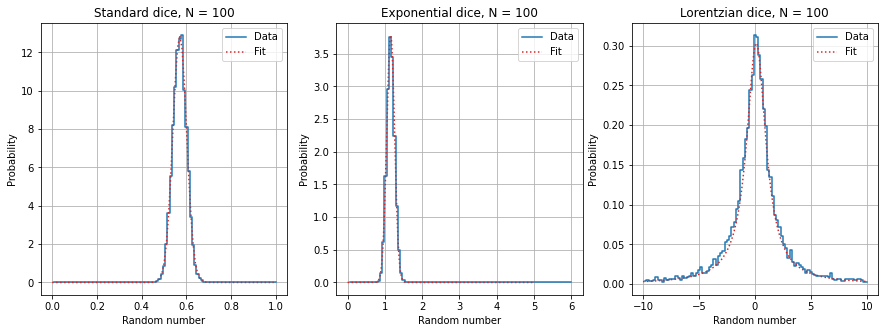

In [6]:
from scipy.optimize import curve_fit

def gauss(x, mean, sigma):
    return 1. / (sigma * np.sqrt(2 * np.pi)) * np.exp(-(x - mean)**2 / (2 * sigma**2))
def lorentz(x, x0, y0):
    return 1 / np.pi * y0 / ((x - x0)**2 + y0**2)

popt_std, pcov_std = curve_fit(gauss, standard_dice_hist[1][1:], standard_dice_hist[0][3])
popt_exp, pcov_exp = curve_fit(gauss, exponential_dice_hist[1][1:],exponential_dice_hist[0][3])
popt_lor, pcov_lor = curve_fit(lorentz, lorentzian_dice_hist[1][1:],lorentzian_dice_hist[0][3])

plt.figure(figsize=(15,5))


plt.subplot(131)
plt.step(standard_dice_hist[1][1:],standard_dice_hist[0][3], where='mid', color="tab:blue", label="Data")
plt.plot(np.arange(0.,1.,0.01), gauss(np.arange(0.,1.,0.01), popt_std[0], popt_std[1]), color="tab:red", linestyle="dotted", label="Fit")
plt.grid(True)
plt.xlabel('Random number')
plt.ylabel('Probability')
plt.legend()
plt.title("Standard dice, N = 100")


plt.subplot(132)
plt.step(exponential_dice_hist[1][1:],exponential_dice_hist[0][3], where='mid', color="tab:blue", label="Data")
plt.plot(np.arange(0.,5.,0.01), gauss(np.arange(0.,5.,0.01), popt_exp[0], popt_exp[1]), color="tab:red", linestyle="dotted", label="Fit")
plt.grid(True)
plt.xlabel('Random number')
plt.ylabel('Probability')
plt.legend()
plt.title("Exponential dice, N = 100")

plt.subplot(133)
plt.step(lorentzian_dice_hist[1][1:],lorentzian_dice_hist[0][3], where='mid', color="tab:blue", label="Data")
plt.plot(np.arange(-10.,10.,0.01), lorentz(np.arange(-10.,10.,0.01), popt_lor[0], popt_lor[1]), color="tab:red", linestyle="dotted", label="Fit")
plt.grid(True)
plt.xlabel('Random number')
plt.ylabel('Probability')
plt.legend()
plt.title("Lorentzian dice, N = 100")

plt.show()

Nei primi due casi la Gaussiana approssima bene la somma delle variabili generate casualmente, a conferma del teorema del limite centrale. Nel secondo caso osserviamo che la distribuzione lorentziana assomiglia alla somma di numeri generati con probabilità di Cauchy-Lorentz, confermando la stabilità di questa distribuzione.

### Esercizio 01.3

In questo esercizio si vuole simulare l'esperimento di Buffon per la stima del valore di $\pi$.
Nella mia simulazione ho utilizzato $2$ unità come distanza tra due linee e $1.2$ come lunghezza degli aghi, che risultano in una probabilità di colpire la linea di $P \sim 0.4$

Di seguito è riportato il grafico della stima di $\pi$ con relativa incertezza, in funzione del numero di blocchi.

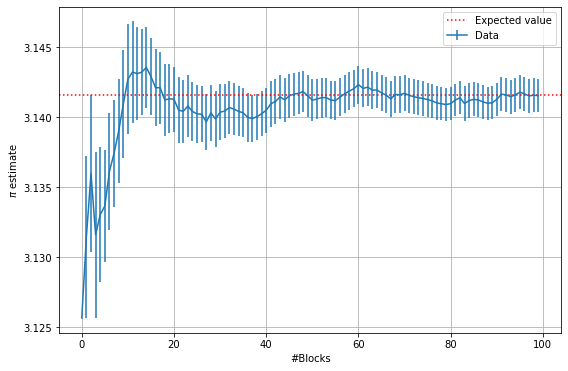

In [7]:
plt.figure(figsize = (9, 6))

pi_estimate, std_err = np.loadtxt("../results/EX013.dat", delimiter = " ", unpack = True)
x = np.arange(0,100)

plt.ylabel('$\pi$ estimate')
plt.xlabel('#Blocks')
plt.grid(True)
plt.axhline(y=np.pi, color='r', linestyle="dotted", label = "Expected value")
plt.errorbar(x, pi_estimate, std_err, label = "Data")
plt.legend()

plt.show()

Il valore finale di $3.1416 ± 0.0012$ è in buon accordo con il reale valore di $\pi$.